# Phase 5 – Non-Linear Models: Decision Tree Regression

In this phase, we move beyond linear and regularized models to **non-linear regression** methods.  
The goal is to capture patterns that linear models cannot, such as:
- non-linear relationships
- feature interactions
- spatial structure in the data

We start with **Decision Tree Regression** as the simplest non-linear model, which will help us understand how increasing model expressiveness affects performance before moving to ensemble methods.

In [9]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [10]:
X_train_scaled = np.load("../data/v1_train_test/X_train_scaled.npy")
X_test_scaled  = np.load("../data/v1_train_test/X_test_scaled.npy")
y_train = np.load("../data/v1_train_test/y_train.npy")
y_test  = np.load("../data/v1_train_test/y_test.npy")


In [11]:
dt = DecisionTreeRegressor(
    max_depth=5,
    min_samples_leaf=50,
    random_state=42
)

dt.fit(X_train_scaled, y_train)


,criterion,'squared_error'
,splitter,'best'
,max_depth,5
,min_samples_split,2
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,ccp_alpha,0.0


In [12]:
y_pred_dt = dt.predict(X_test_scaled)

rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
mae_dt  = mean_absolute_error(y_test, y_pred_dt)
r2_dt   = r2_score(y_test, y_pred_dt)

rmse_dt, mae_dt, r2_dt


(np.float64(0.7248866108610242), 0.523351729615321, 0.599010227088826)

In [13]:
rf = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    min_samples_leaf=10,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train_scaled, y_train)


,n_estimators,300
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,10
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [14]:
y_pred_rf = rf.predict(X_test_scaled)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf  = mean_absolute_error(y_test, y_pred_rf)
r2_rf   = r2_score(y_test, y_pred_rf)

rmse_rf, mae_rf, r2_rf


(np.float64(0.5271433106704959), 0.3434785240965932, 0.7879440124428339)

In [15]:
gbr = GradientBoostingRegressor(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=3,
    random_state=42
)

gbr.fit(X_train_scaled, y_train)

,loss,'squared_error'
,learning_rate,0.05
,n_estimators,500
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [16]:
y_pred_gbr = gbr.predict(X_test_scaled)

rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
mae_gbr  = mean_absolute_error(y_test, y_pred_gbr)
r2_gbr   = r2_score(y_test, y_pred_gbr)

rmse_gbr, mae_gbr, r2_gbr


(np.float64(0.5012539869935673), 0.338766029951405, 0.808261723134533)

In [17]:
# Final summary comparison of all models trained above
def eval_model(name, model):
    model.fit(X_train_scaled, y_train)
    pred = model.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    mae  = mean_absolute_error(y_test, pred)
    r2   = r2_score(y_test, pred)
    return {"Model": name, "RMSE": rmse, "MAE": mae, "R2": r2}

results = []

# Baseline 
results.append(eval_model("LinearRegression", LinearRegression()))

# Decision Tree 
results.append(eval_model("DecisionTree (depth=5, leaf=50)",
                          DecisionTreeRegressor(max_depth=5, min_samples_leaf=50, random_state=42)))

# Random Forest (your strong baseline)
results.append(eval_model("RandomForest (300 trees, leaf=10)",
                          RandomForestRegressor(n_estimators=300, min_samples_leaf=10,
                                               random_state=42, n_jobs=-1)))

# Gradient Boosting
results.append(eval_model("GradientBoosting (500, lr=0.05, depth=3)",
                          GradientBoostingRegressor(n_estimators=500, learning_rate=0.05,
                                                   max_depth=3, random_state=42)))

df_results = pd.DataFrame(results).sort_values(by="R2", ascending=False).reset_index(drop=True)
df_results


,Model,RMSE,MAE,R2
0,"GradientBoosting (500, lr=0.05, depth=3)",0.501254,0.338766,0.808262
1,"RandomForest (300 trees, leaf=10)",0.527143,0.343479,0.787944
2,"DecisionTree (depth=5, leaf=50)",0.724887,0.523352,0.599010
3,LinearRegression,0.745581,0.533200,0.575788


## 5.4 Advanced Boosting: XGBoost & LightGBM


## 5.4 Advanced Boosting: XGBoost & LightGBM

In this section, we evaluate two industry-standard gradient boosting frameworks—**XGBoost** and **LightGBM**—to see whether optimized boosting implementations can outperform sklearn’s Gradient Boosting on the California Housing task.

**Why these models**
- Better regularization and optimized training compared to classic Gradient Boosting
- Strong performance on tabular datasets
- Commonly used in real-world ML systems

We use the same train/test split and metrics (**RMSE, MAE, R²**) for a fair comparison.


In [18]:
from xgboost import XGBRegressor
import lightgbm as lgb

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [19]:
xgb = XGBRegressor(
    n_estimators=800,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,      # L1 regularization
    reg_lambda=1.0,     # L2 regularization
    objective="reg:squarederror",
    random_state=42,
    n_jobs=-1
)

xgb.fit(X_train_scaled, y_train)

y_pred_xgb = xgb.predict(X_test_scaled)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb  = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb   = r2_score(y_test, y_pred_xgb)

rmse_xgb, mae_xgb, r2_xgb


(np.float64(0.4589973227355663), 0.30552859512116554, 0.8392268781909342)

In [20]:
from sklearn.datasets import fetch_california_housing

In [21]:
# Load feature names
housing = fetch_california_housing()
feature_names = housing.feature_names

In [22]:
# Convert arrays to DataFrames to keep feature names (avoids warning)
X_train_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_df  = pd.DataFrame(X_test_scaled, columns=feature_names)

In [23]:
# LightGBM Regressor
lgbm = lgb.LGBMRegressor(
    n_estimators=2000,
    learning_rate=0.03,
    num_leaves=31,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    reg_alpha=0.0,
    reg_lambda=0.0,
    random_state=42,
    n_jobs=-1, 
    force_col_wise=True,
)

In [24]:
# Train
lgbm.fit(X_train_df, y_train)

[LightGBM] [Info] Total Bins 1838
[LightGBM] [Info] Number of data points in the train set: 16512, number of used features: 8
[LightGBM] [Info] Start training from score 2.071947


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.03
,n_estimators,2000
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [25]:
# Predict
y_pred_lgb = lgbm.predict(X_test_df)


In [26]:
# Evaluate
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mae_lgb  = mean_absolute_error(y_test, y_pred_lgb)
r2_lgb   = r2_score(y_test, y_pred_lgb)
rmse_lgb, mae_lgb, r2_lgb

(np.float64(0.4276242396588178), 0.278346793640485, 0.8604538786133337)

In [27]:
print("Gradient Boosting (sklearn):", (rmse_gbr, mae_gbr, r2_gbr))
print("XGBoost:", (rmse_xgb, mae_xgb, r2_xgb))
print("LightGBM:", (rmse_lgb, mae_lgb, r2_lgb))

Gradient Boosting (sklearn): (np.float64(0.5012539869935673), 0.338766029951405, 0.808261723134533)
XGBoost: (np.float64(0.4589973227355663), 0.30552859512116554, 0.8392268781909342)
LightGBM: (np.float64(0.4276242396588178), 0.278346793640485, 0.8604538786133337)


In [28]:
import matplotlib.pyplot as plt

<Figure size 800x600 with 0 Axes>

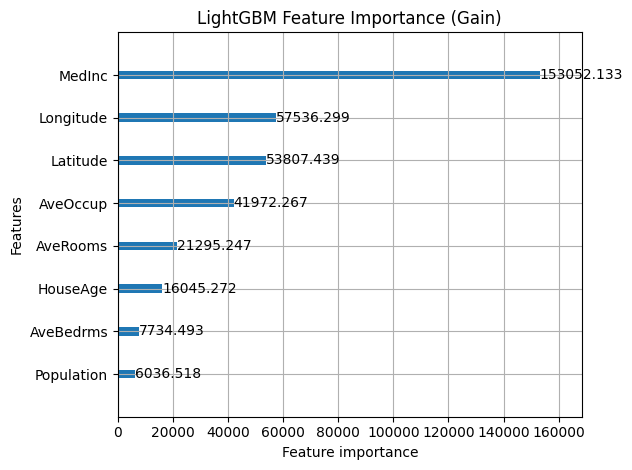

In [29]:
# Plot feature importance
plt.figure(figsize=(8, 6))
lgb.plot_importance(
    lgbm,
    max_num_features=10,
    importance_type="gain"  # gain = contribution to loss reduction
)
plt.title("LightGBM Feature Importance (Gain)")
plt.tight_layout()
plt.show()

In [33]:
# Use subsets for speed (SHAP can be heavy on full datasets)
X_bg = X_train_df.sample(1000, random_state=42)       # background/reference
X_explain = X_test_df.sample(2000, random_state=42)   # points to explain

explainer = shap.TreeExplainer(
    lgbm,
    data=X_bg,
    feature_perturbation="interventional"
)

shap_values = explainer.shap_values(X_explain)

shap_values.shape

100%|===================| 1994/2000 [04:58<00:00]        

(2000, 8)

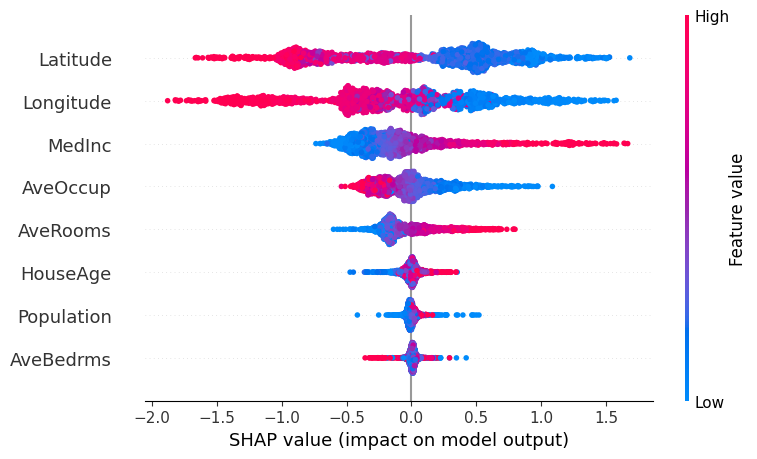

In [34]:
shap.summary_plot(shap_values, X_explain)

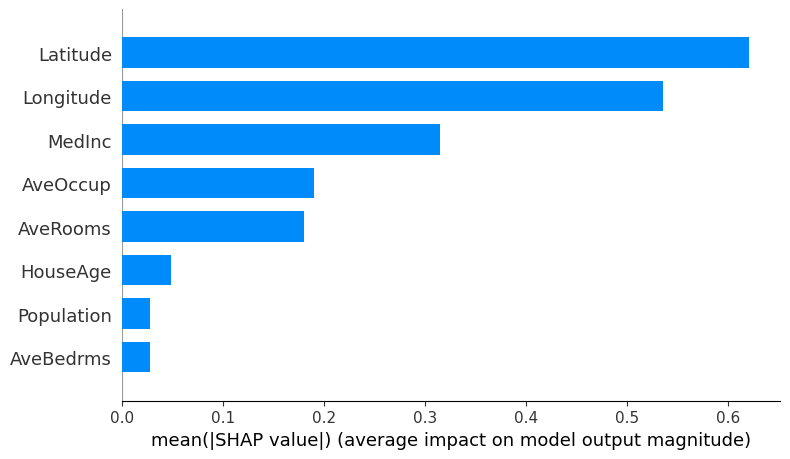

In [35]:
shap.summary_plot(shap_values, X_explain, plot_type="bar")

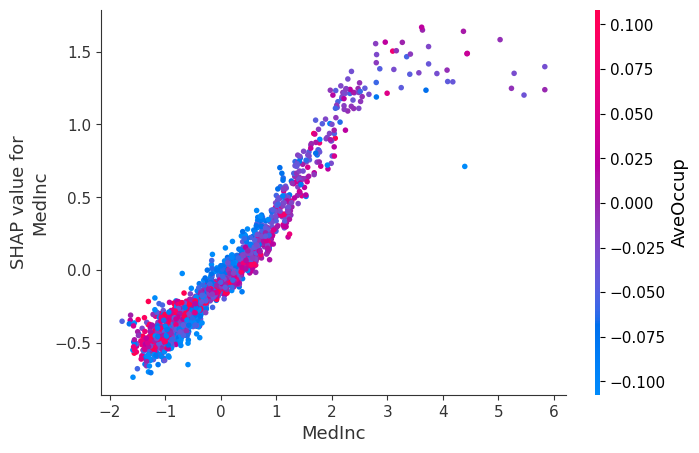

In [36]:
shap.dependence_plot("MedInc", shap_values, X_explain)

Baseline (expected value): 2.2515944413618008
Prediction: 2.890956713838531


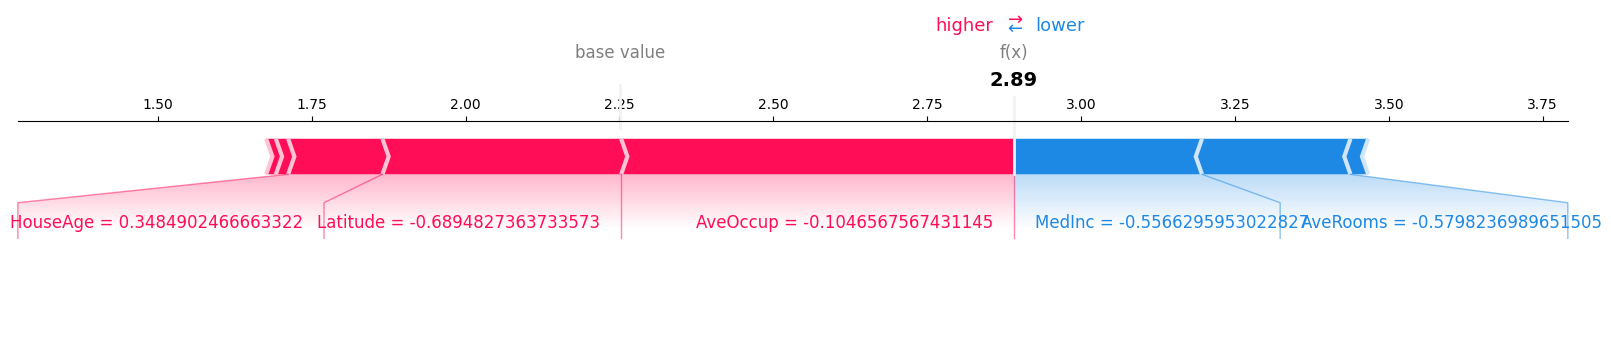

In [37]:
i = 0  # change this index to inspect different cases
row = X_explain.iloc[[i]]

pred = float(lgbm.predict(row)[0])
base = float(explainer.expected_value)

print("Baseline (expected value):", base)
print("Prediction:", pred)

shap.force_plot(base, explainer.shap_values(row), row, matplotlib=True)

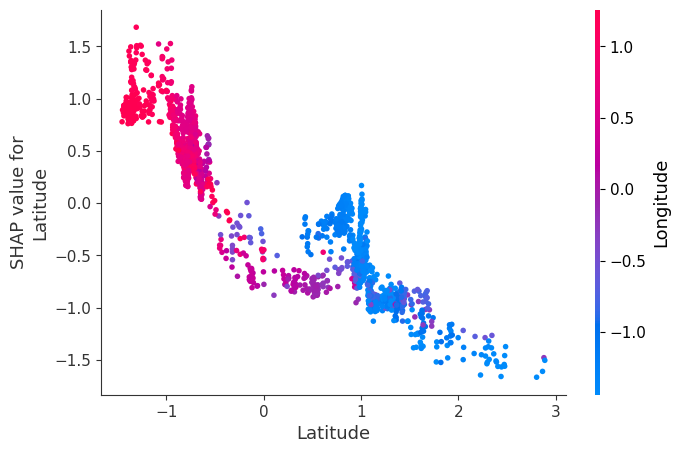

In [40]:
shap.dependence_plot("Latitude", shap_values, X_explain)

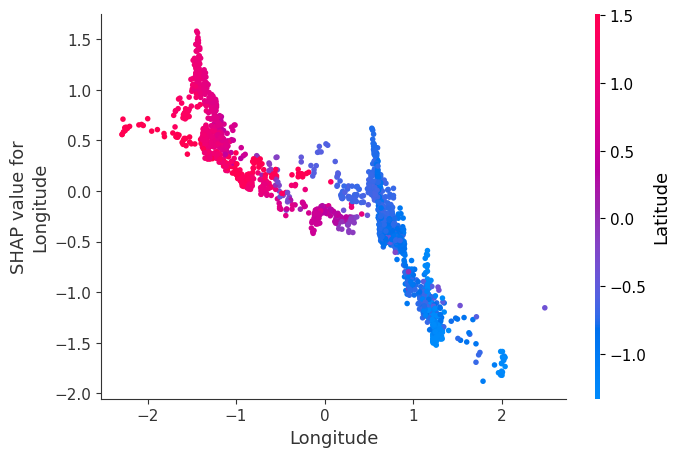

In [41]:
shap.dependence_plot("Longitude", shap_values, X_explain)